In [14]:
import pandas as pd

In [ ]:
#import file and add date column
path_weather = "/Users/giulioelmi/Desktop/kelshi_trading/training_weather_data.csv"
NOAA_df = pd.read_csv(path_weather)
NOAA_df["DATE"] = pd.to_datetime(NOAA_df["DATE"])

In [16]:
#start exploring the data
print(NOAA_df.info(), "\n")
print("date range:", NOAA_df["DATE"].min(), NOAA_df["DATE"].max(), "\n")
print(NOAA_df[["TMAX", "TMIN"]].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  12397 non-null  object        
 1   NAME     12397 non-null  object        
 2   DATE     12397 non-null  datetime64[ns]
 3   ACMH     1886 non-null   float64       
 4   ACSH     1886 non-null   float64       
 5   AWND     12288 non-null  float64       
 6   FMTM     6069 non-null   float64       
 7   PGTM     6745 non-null   float64       
 8   PRCP     12397 non-null  float64       
 9   TAVG     7197 non-null   float64       
 10  TMAX     12397 non-null  int64         
 11  TMIN     12397 non-null  int64         
 12  TSUN     1146 non-null   float64       
 13  WDF1     458 non-null    float64       
 14  WDF2     10641 non-null  float64       
 15  WDF5     10232 non-null  float64       
 16  WDFG     1880 non-null   float64       
 17  WSF1     458 non-null    float6

In [17]:
NOAA_df.head()

,STATION,NAME,DATE,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,TAVG,...,TMIN,TSUN,WDF1,WDF2,WDF5,WDFG,WSF1,WSF2,WSF5,WSFG
0,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",1992-01-01,70.0,80.0,8.95,NaN,2108.0,0.00,NaN,...,48,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN,19.5
1,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",1992-01-02,90.0,90.0,9.40,NaN,1151.0,0.01,NaN,...,56,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,30.0
2,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",1992-01-03,90.0,100.0,9.40,NaN,1520.0,0.39,NaN,...,50,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,27.5
3,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",1992-01-04,90.0,90.0,6.04,NaN,2358.0,0.00,NaN,...,52,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,17.2
4,USW00023174,"LOS ANGELES INTERNATIONAL AIRPORT, CA US",1992-01-05,100.0,100.0,8.95,NaN,1004.0,0.84,NaN,...,50,NaN,NaN,NaN,NaN,270.0,NaN,NaN,NaN,34.4


array([[<Axes: title={'center': 'DATE'}>,
        <Axes: title={'center': 'ACMH'}>,
        <Axes: title={'center': 'ACSH'}>,
        <Axes: title={'center': 'AWND'}>],
       [<Axes: title={'center': 'FMTM'}>,
        <Axes: title={'center': 'PGTM'}>,
        <Axes: title={'center': 'PRCP'}>,
        <Axes: title={'center': 'TAVG'}>],
       [<Axes: title={'center': 'TMAX'}>,
        <Axes: title={'center': 'TMIN'}>,
        <Axes: title={'center': 'TSUN'}>,
        <Axes: title={'center': 'WDF1'}>],
       [<Axes: title={'center': 'WDF2'}>,
        <Axes: title={'center': 'WDF5'}>,
        <Axes: title={'center': 'WDFG'}>,
        <Axes: title={'center': 'WSF1'}>],
       [<Axes: title={'center': 'WSF2'}>,
        <Axes: title={'center': 'WSF5'}>,
        <Axes: title={'center': 'WSFG'}>, <Axes: >]], dtype=object)

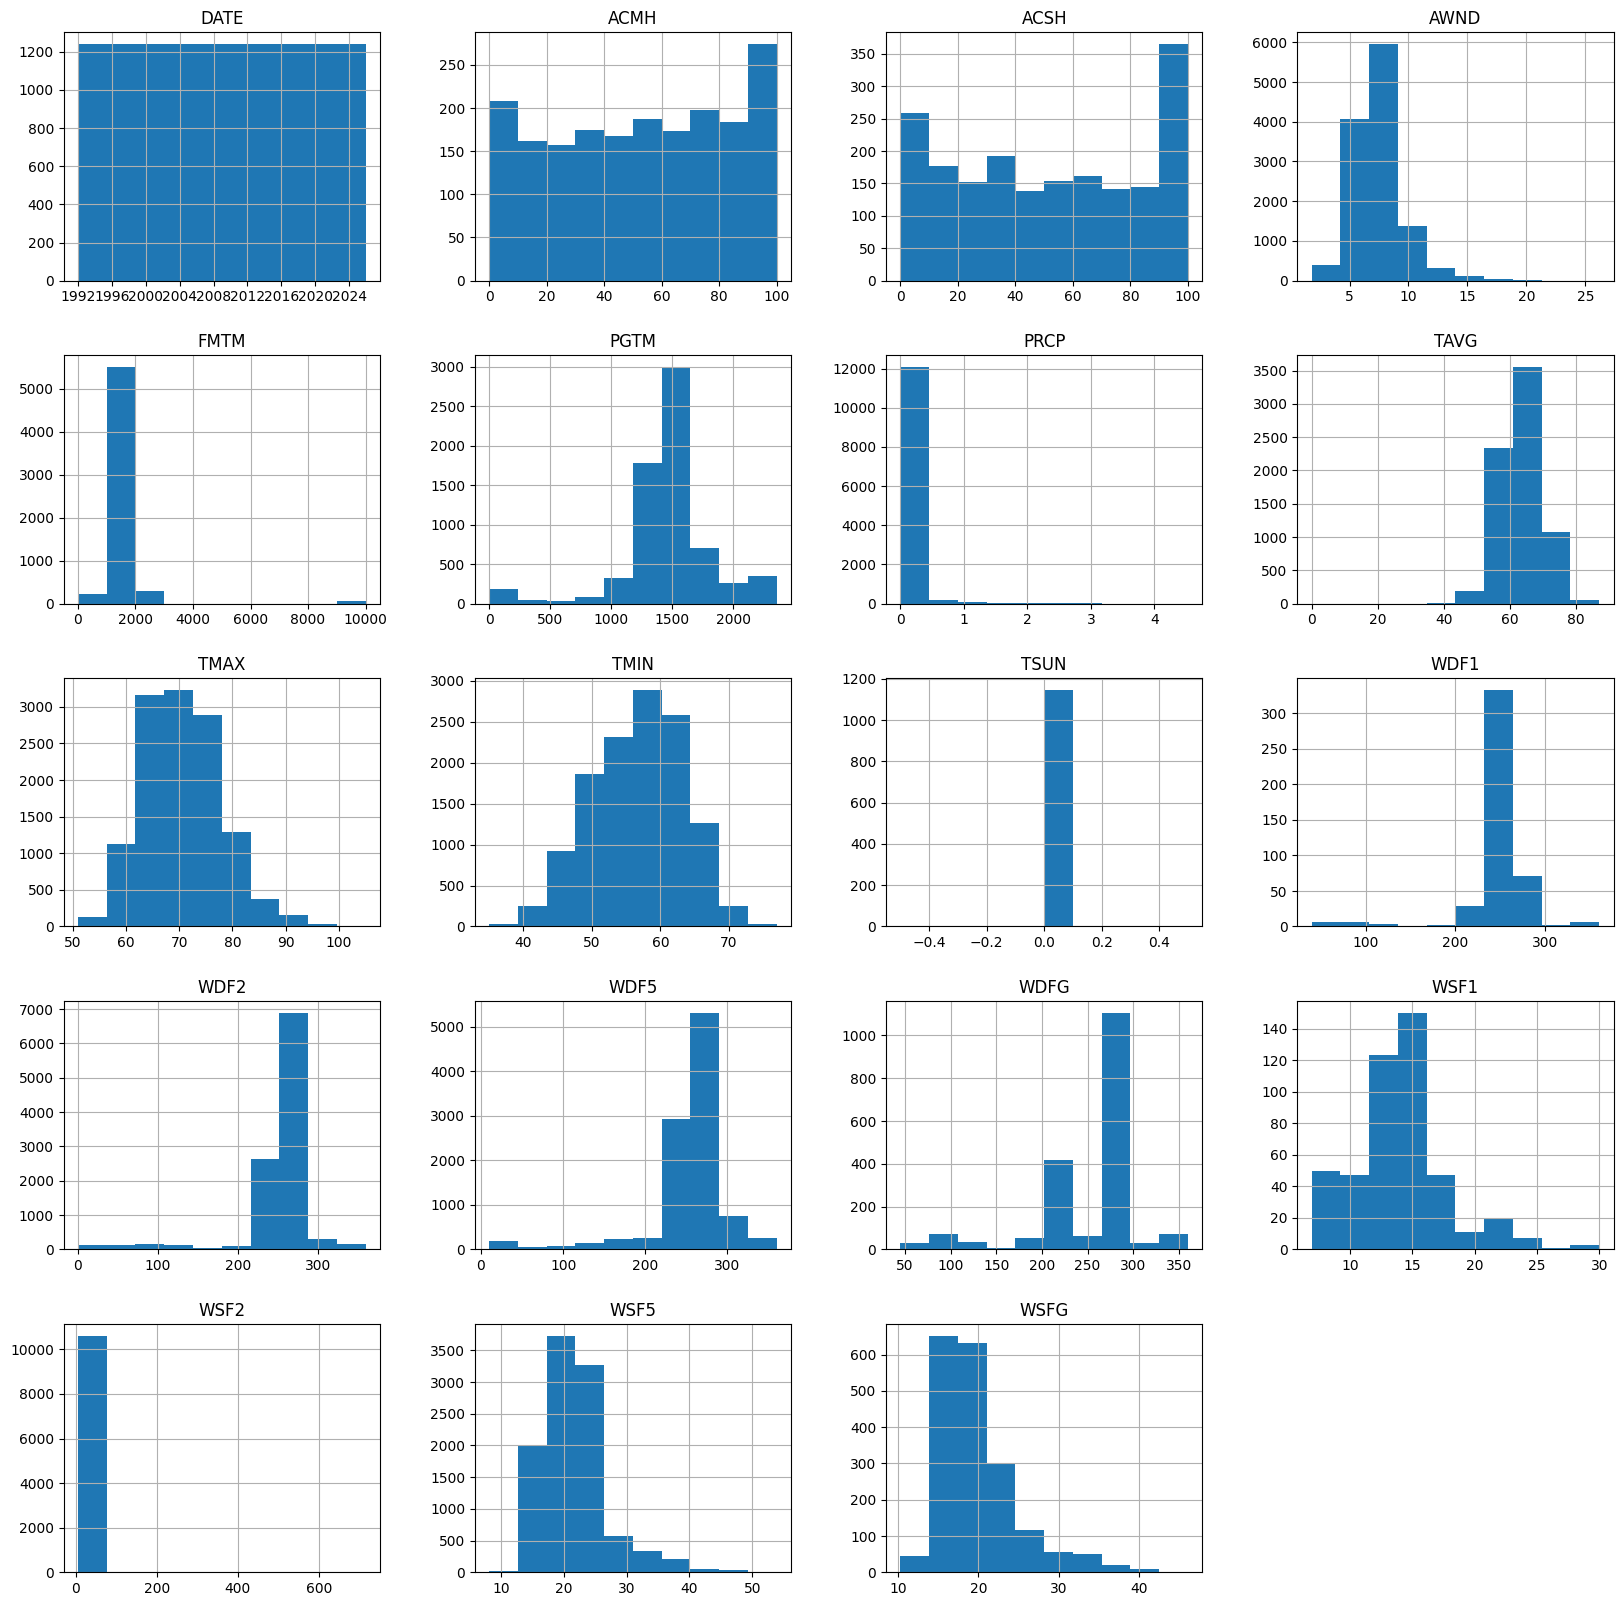

In [18]:
#plotting the data
NOAA_df.hist(figsize= (20,20))

In [19]:
#deciding which columns to keep, based on the number of nulls and importance
keep_col = ["DATE", "TMAX", "TMIN", "PRCP", "AWND", "WDF2", "WSF2"]
data = NOAA_df[keep_col]
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    12397 non-null  datetime64[ns]
 1   TMAX    12397 non-null  int64         
 2   TMIN    12397 non-null  int64         
 3   PRCP    12397 non-null  float64       
 4   AWND    12288 non-null  float64       
 5   WDF2    10641 non-null  float64       
 6   WSF2    10641 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 678.1 KB


/var/folders/7d/dvvdf5fj3_b9534z4rpkvr440000gn/T/ipykernel_34429/1041269086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["year"] = data["DATE"].dt.year
/var/folders/7d/dvvdf5fj3_b9534z4rpkvr440000gn/T/ipykernel_34429/1041269086.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().sum())


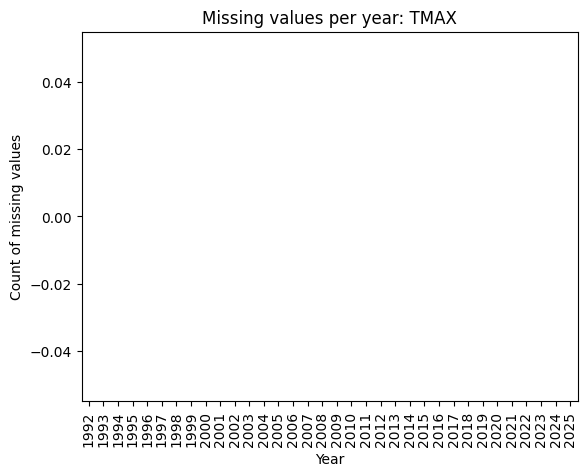

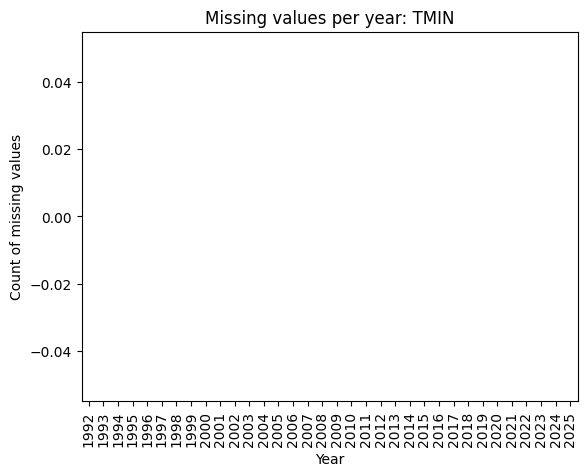

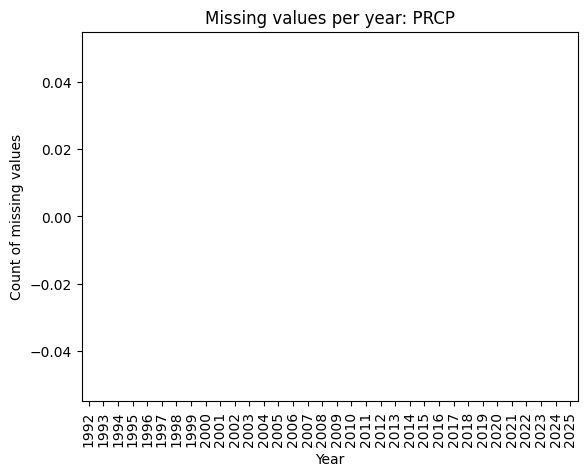

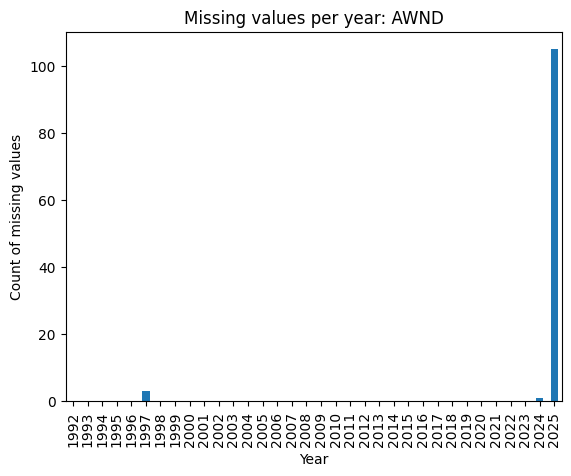

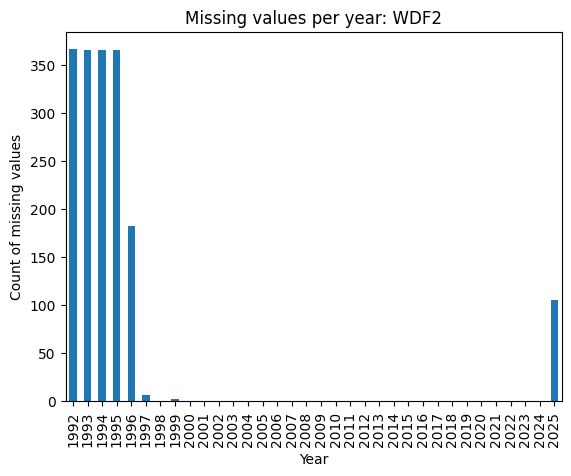

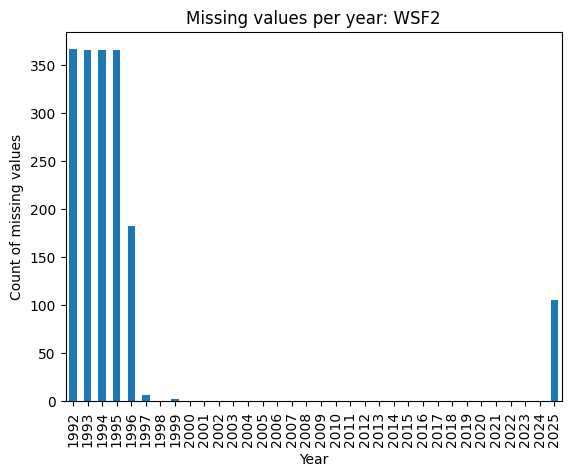

In [20]:
#plotting missing variables by year
data["year"] = data["DATE"].dt.year
missing_by_year = (
    data.groupby("year")
      .apply(lambda x: x.isna().sum())
)
import matplotlib.pyplot as plt

for col in ["TMAX", "TMIN", "PRCP", "AWND", "WDF2", "WSF2"]:
    plt.figure()
    missing_by_year[col].plot(kind="bar")
    plt.title(f"Missing values per year: {col}")
    plt.xlabel("Year")
    plt.ylabel("Count of missing values")
    plt.show()


In [21]:
#slicing the data so we have almost no nulls
start = "1998-01-01"
end   = "2025-12-07"

data = data[(data["DATE"] >= start) & (data["DATE"] <= end)].copy()

/var/folders/7d/dvvdf5fj3_b9534z4rpkvr440000gn/T/ipykernel_34429/292298166.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().sum())


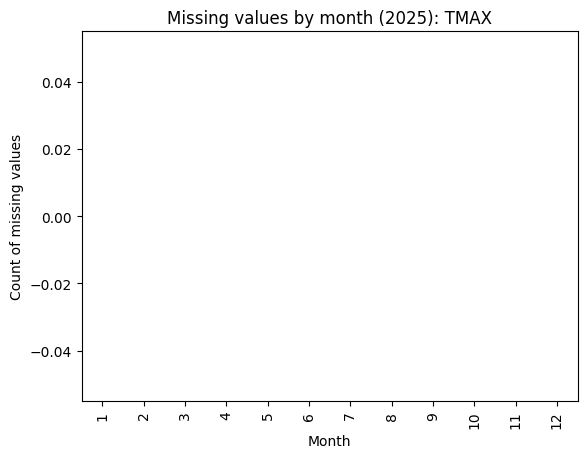

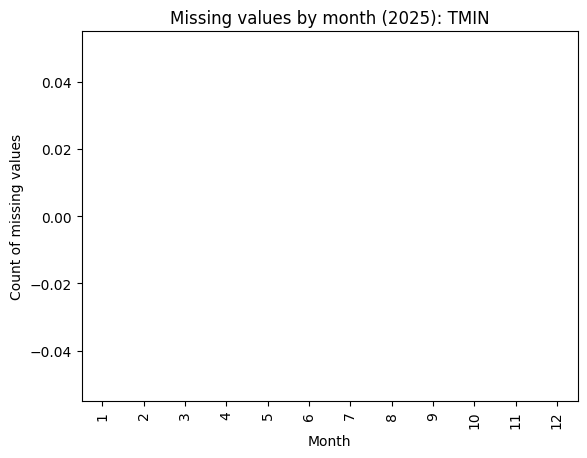

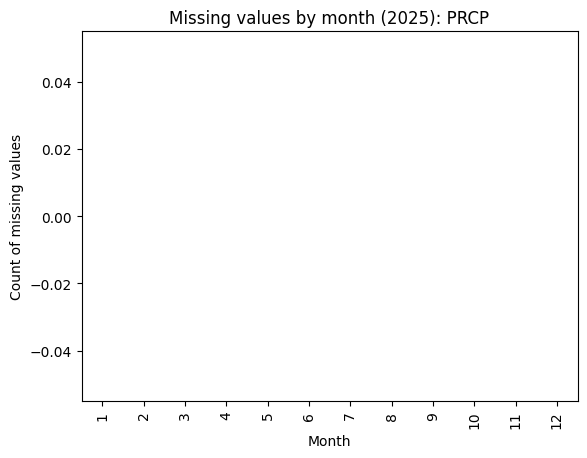

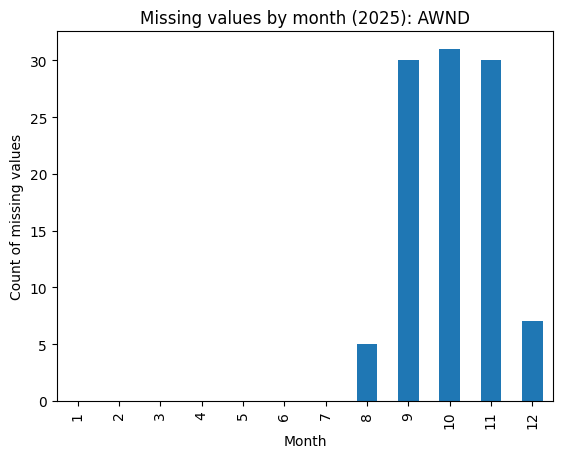

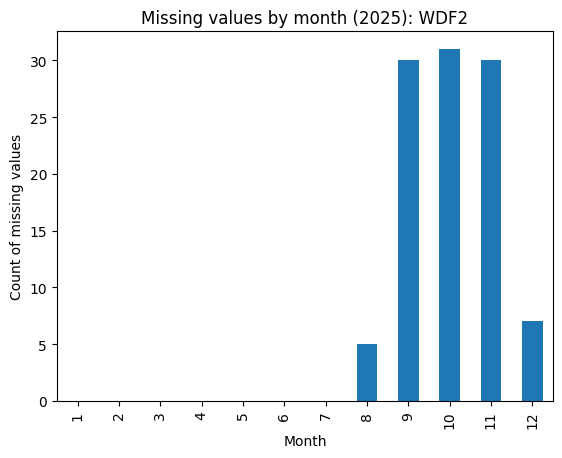

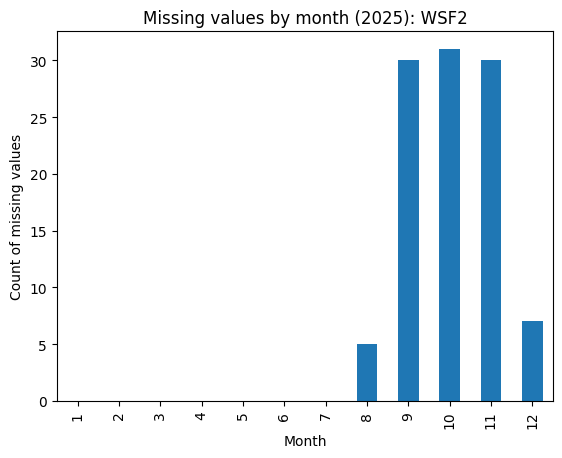

In [22]:
#plotting missing variables my month in 2025
data_2025 = data[data["DATE"].dt.year == 2025].copy()
data_2025["month"] = data_2025["DATE"].dt.month
missing_by_month_2025 = (
    data_2025
    .groupby("month")
    .apply(lambda x: x.isna().sum())
)
cols = ["TMAX", "TMIN", "PRCP", "AWND", "WDF2", "WSF2"]

for col in cols:
    plt.figure()
    missing_by_month_2025[col].plot(kind="bar")
    plt.title(f"Missing values by month (2025): {col}")
    plt.xlabel("Month")
    plt.ylabel("Count of missing values")
    plt.show()

In [32]:
#slicing more to reduce the nulls and line up with reforecast data
start = "1998-01-01"
end   = "2025-07-31"

weather_data = data[(data["DATE"] >= start) & (data["DATE"] <= end)].copy()


In [24]:
#save file

In [33]:
weather_data.to_csv("/Users/giulioelmi/Desktop/kelshi_trading/full_weather_data.csv", index=False)

In [34]:
#slicing more to match it with reforecast data
start = "2021-01-01"
end   = "2025-07-31"

weather_data = data[(data["DATE"] >= start) & (data["DATE"] <= end)].copy()

weather_data.to_csv("/Users/giulioelmi/Desktop/kelshi_trading/final_weather_data.csv", index=False)